A map of the population density
===========

France is divided in zones, called IRIS zones. They are available on the wesite of IGN (Institut de Géographie National)

http://professionnels.ign.fr/contoursiris

For metropolian France, the projection used is *lambert 93*.

In [2]:
import geopandas as gp
import cartopy.crs as ccrs


contours_iris = gp.GeoDataFrame.from_file('iris/CONTOURS-IRIS_2-1/CONTOURS-IRIS.shp')
print(contours_iris.crs)
contours_iris.head()

epsg:2154


,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((756161.100 6847322.000, 756156.900 6..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.500 7022290.500, 767647.200 7..."


Let's add a column (*superficie*) with the areas of these zone to the dataframe. 
Source : https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas

With this projection (and for this geographic part of the World), the areas of the projection correspond quite well to the actual areas.

In [5]:
contours_iris["superficie"] = round(contours_iris['geometry'].area/ 10**6,2)
contours_iris.head(2) 

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,superficie
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6...",54.19
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6...",4.09


Now we have to find the population in 2013 for each of these IRIS zones :
https://www.insee.fr/fr/statistiques/2386737

In [6]:
import pandas as pd
demographies = pd.read_csv("iris/demographie_france_2013.csv",sep=',',low_memory=False)
demographies.head(3)

,CODE_IRIS,REG,REG2016,DEP,UU2010,COM,LIBCOM,TRIRIS,GRD_QUART,LIBIRIS,...,C13_F15P_CS4,C13_F15P_CS5,C13_F15P_CS6,C13_F15P_CS7,C13_F15P_CS8,P13_POP_FR,P13_POP_ETR,P13_POP_IMM,P13_PMEN,P13_PHORMEN
0,IRIS,Région,Région 2016,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,...,Pop 15 ans ou plus Femmes Prof. intermédiaires...,Pop 15 ans ou plus Femmes Employés en 2013 (co...,Pop 15 ans ou plus Femmes Ouvriers en 2013 (co...,Pop 15 ans ou plus Femmes Retraités en 2013 (c...,Pop 15 ans ou plus Femmes Autres en 2013 (compl),Pop Français en 2013 (princ),Pop Etrangers en 2013 (princ),Pop Immigrés en 2013 (princ),Pop ménages en 2013 (princ),Pop hors ménages en 2013 (princ)
1,10010000,82,84,1,1000,1001,L'Abergement-Clémenciat,ZZZZZZ,100100,L'Abergement-Clémenciat (commune non irisée),...,59,94,8,75,39,747,20,29,767,0
2,10020000,82,84,1,1000,1002,L'Abergement-de-Varey,ZZZZZZ,100200,L'Abergement-de-Varey (commune non irisée),...,24,8,0,36,8,233,3,5,236,0


Let's make a bit of cleaning.

In [7]:
demographies = demographies.drop(index=0)
demographies.head(2)

,CODE_IRIS,REG,REG2016,DEP,UU2010,COM,LIBCOM,TRIRIS,GRD_QUART,LIBIRIS,...,C13_F15P_CS4,C13_F15P_CS5,C13_F15P_CS6,C13_F15P_CS7,C13_F15P_CS8,P13_POP_FR,P13_POP_ETR,P13_POP_IMM,P13_PMEN,P13_PHORMEN
1,10010000,82,84,1,1000,1001,L'Abergement-Clémenciat,ZZZZZZ,100100,L'Abergement-Clémenciat (commune non irisée),...,59,94,8,75,39,747,20,29,767,0
2,10020000,82,84,1,1000,1002,L'Abergement-de-Varey,ZZZZZZ,100200,L'Abergement-de-Varey (commune non irisée),...,24,8,0,36,8,233,3,5,236,0


 Iris code (build with 9 figures), in the dataframe table iris_contour, some begin with 01,02,...,09, where they start with 1,2,...,9 in the dataframe with the population.
Let's fix it by adding one zero (at the beginning) where it's needed.

In [8]:
demographies["CODE_IRIS"] = demographies["CODE_IRIS"].str.zfill(9)
demographies.head(2)

,CODE_IRIS,REG,REG2016,DEP,UU2010,COM,LIBCOM,TRIRIS,GRD_QUART,LIBIRIS,...,C13_F15P_CS4,C13_F15P_CS5,C13_F15P_CS6,C13_F15P_CS7,C13_F15P_CS8,P13_POP_FR,P13_POP_ETR,P13_POP_IMM,P13_PMEN,P13_PHORMEN
1,010010000,82,84,1,1000,1001,L'Abergement-Clémenciat,ZZZZZZ,100100,L'Abergement-Clémenciat (commune non irisée),...,59,94,8,75,39,747,20,29,767,0
2,010020000,82,84,1,1000,1002,L'Abergement-de-Varey,ZZZZZZ,100200,L'Abergement-de-Varey (commune non irisée),...,24,8,0,36,8,233,3,5,236,0


IRIS code is used as an index for both of the dataframes.

In [9]:
demographies.index = demographies["CODE_IRIS"]
contours_iris.index = contours_iris["CODE_IRIS"]

contours_iris.head(2)

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,superficie
CODE_IRIS,,,,,,,,
721910000,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6...",54.19
772480000,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6...",4.09


Now we add one column for the population and one for the density of population fo each IRIS area.

In [10]:
contours_iris["population"] = demographies["P13_POP"]
contours_iris["densite"] = round(
    contours_iris["population"].astype(float)/contours_iris["superficie"].astype(float),0) 


contours_iris.head(2)

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,superficie,population,densite
CODE_IRIS,,,,,,,,,,
721910000,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6...",54.19,3223,59.0
772480000,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6...",4.09,683,167.0


According to wikipedia, there was 3194 inhabitants à Mayet  in 2011. And the areo of this small town is 53 km2. Our datas seem to match with those informations.

Now, we draw the contour of one French *departement*, with its IRIS zones.
The shapes of the french *departements* (shapefile format) are available : https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/

The projection used is  EuroPP, available with cartopy.https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

The shapefile of IRIS zone use  Lambert93 projection, the must be converted with EuroPP projection. 

In [16]:
import cartopy.crs as ccrs
projection =  ccrs.EuroPP()
crs_proj4 = projection.proj4_init # projection compatible avec geopandas
contours_iris = contours_iris.to_crs(crs_proj4)

In [17]:
depts = gp.GeoDataFrame.from_file('departements/departements.shp')
depts.index=depts["code_insee"]
print(depts.crs)
code_dpt="67"  # on choisit le bas-rhin (67)
# the minimal rectangle that include this area 
extent = depts.loc[code_dpt].geometry.bounds

import numpy as np
# filtre les zones d'un departement
contours_iris_dpt = contours_iris[contours_iris["INSEE_COM"].str[:2]==code_dpt] 

epsg:4326


On voit que ces données utilisent le World Geodetic System : https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84

/home/martin/anaconda3/envs/gpandas/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/martin/anaconda3/envs/gpandas/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


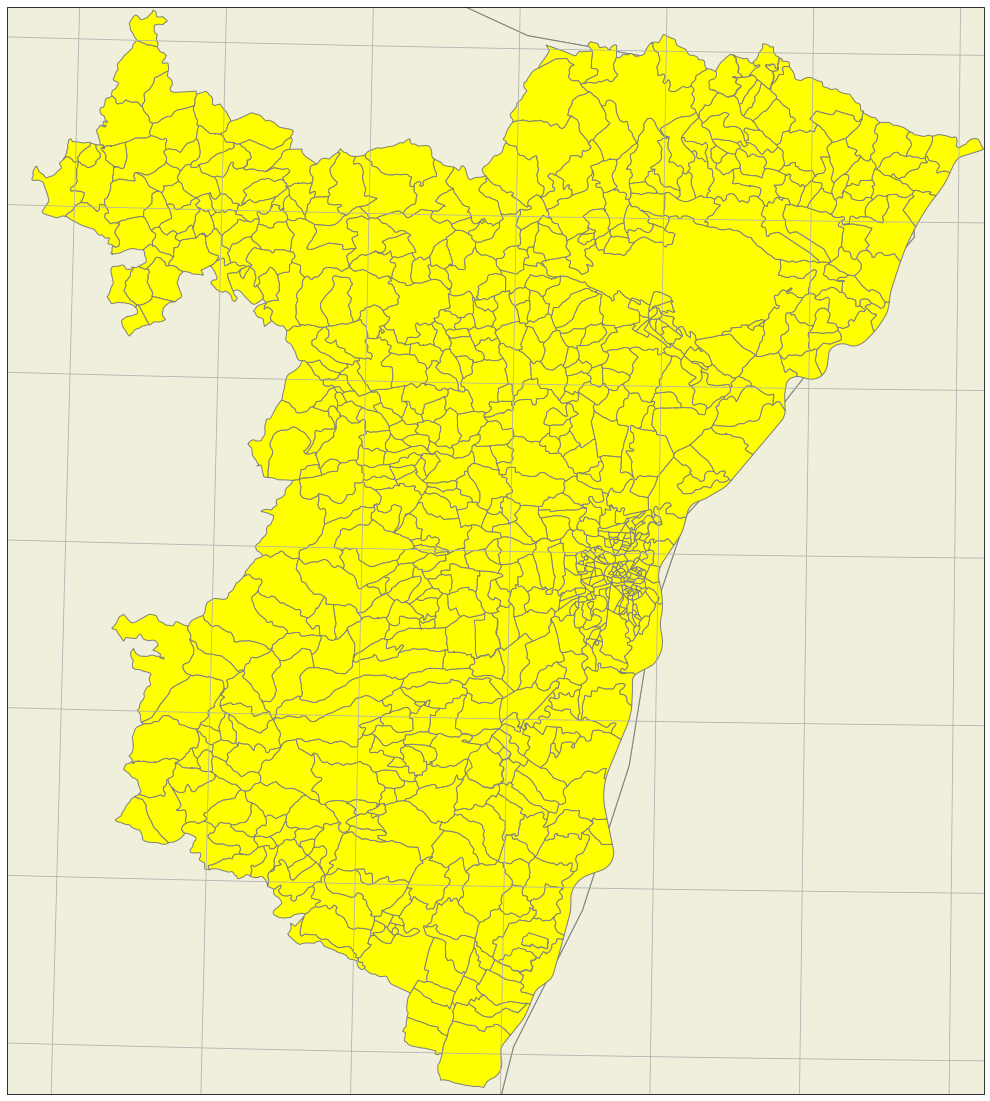

In [18]:
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

def carte(projection,extent=None):
    fig, ax = plt.subplots(figsize=(20,20), subplot_kw=dict(projection=projection))
    if extent!=None:
        ax.set_extent([extent[0],extent[2], extent[1], extent[3]])
    else : ax.set_extent([-5.6,8.5, 42, 52])  # pour une carte de France
    gl = ax.gridlines(draw_labels=False)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

fig,ax = carte(projection=projection,extent=extent)
countries_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m',
                                        edgecolor='gray',
                                        facecolor=cfeature.COLORS['land'])
ax.add_feature(countries_50m)

for index,zone in contours_iris_dpt.iterrows():
        color="yellow"
        if zone["INSEE_COM"][:2]==str(code_dpt):
          ax.add_geometries([zone.geometry], crs=projection,facecolor=color,edgecolor='gray')
plt.show()

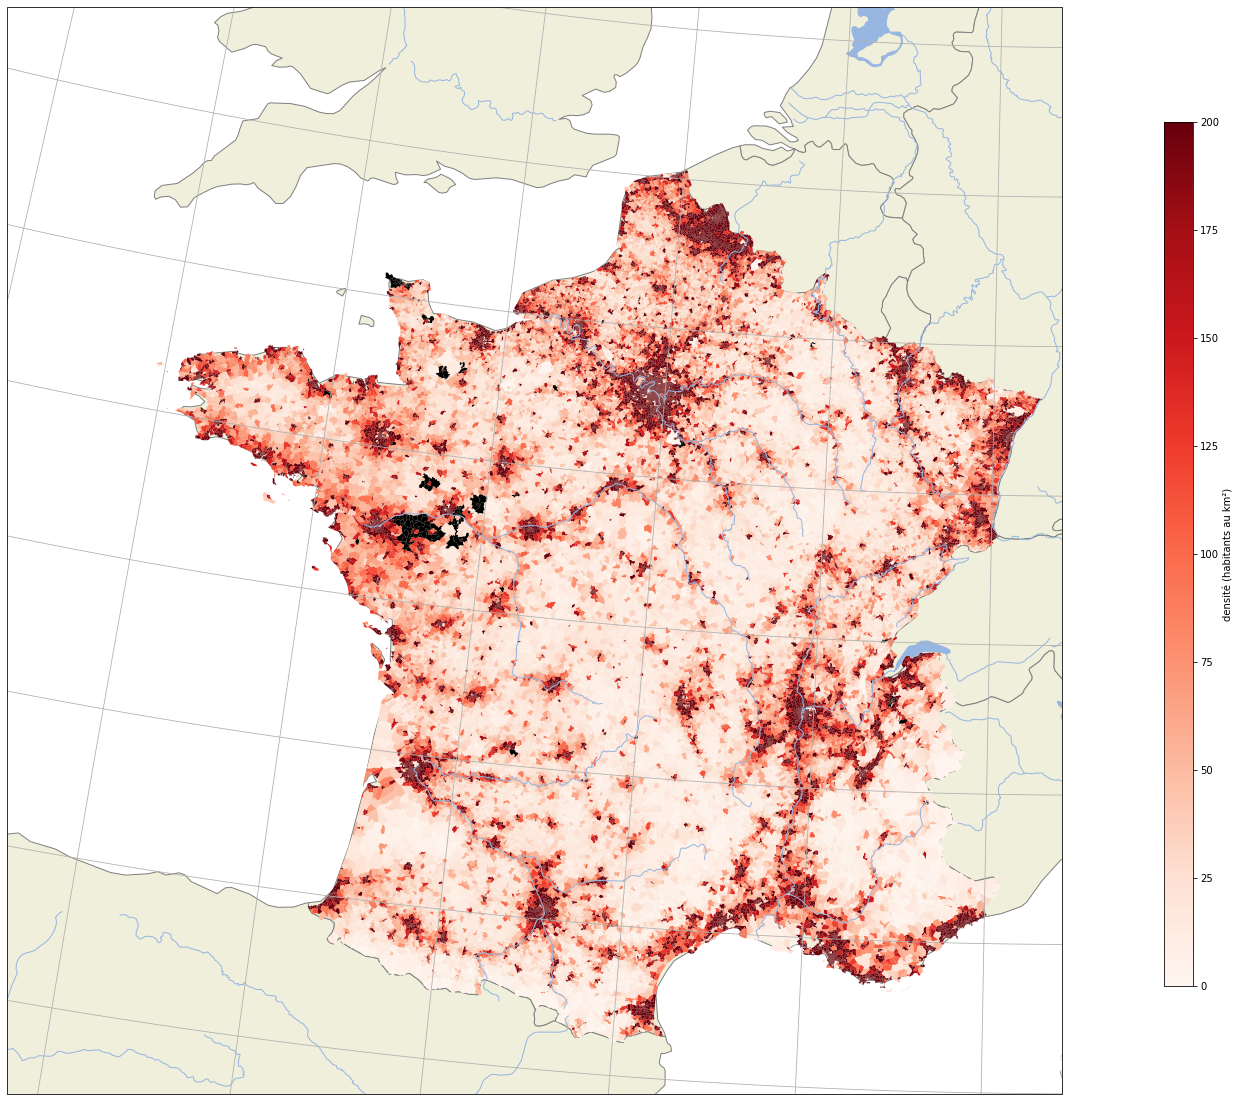

In [19]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=200)
cmap = plt.cm.Reds


#https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/physical/ne_110m_rivers_lake_centerlines.zip

fig,ax = carte(projection=projection,extent=None)
countries_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m',
                                        edgecolor='gray',
                                        facecolor=cfeature.COLORS['land'])
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                                        edgecolor=cfeature.COLORS['water'],
                                         facecolor='none')
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor=cfeature.COLORS['water'],
                                         facecolor=cfeature.COLORS['water'])




ax.add_feature(countries_50m)

for index,zone in contours_iris.iterrows():
        color = mpl.colors.to_hex(cmap(norm(zone["densite"])))
    #    if zone["INSEE_COM"][:2]==str(code_dpt):
        ax.add_geometries([zone.geometry], crs=projection,facecolor=color,edgecolor='none')

ax.add_feature(rivers_10m, linewidth=1)
ax.add_feature(lakes_10m)        
        
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label('densité (habitants au km²)')

plt.show()
